In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
games = pd.read_csv("Tottanham_games.csv")
games.head()

,Game date,Win,Loss,Draw,Points,Tottenham,FTSE
0,1/31/2004,0,1,0,0,-0.0027,-0.0021
1,2/7/2004,1,0,0,3,0.0000,0.0072
2,2/11/2004,1,0,0,3,0.1189,-0.0042
3,2/22/2004,0,0,1,1,0.0000,0.0021
4,3/9/2004,0,1,0,0,0.0000,0.0007


In [3]:
rf = 4.57               # 20-year risk-free rate (%)
equity_beta = 1.29      # Tottanham equity beta
tax_rate = 35           # company tax rate (%)
team_eval = pd.read_csv("team_eval.csv")
team_eval

,Team,Avg. Net Goals (1998-2007),Avg. Points (1998-2007),Operating Income,Revenue,Net Debt/EV,Enterprise Value (EV)a
0,Manchester United,42.7,82,50,169,0.84,934
1,Arsenal,38.1,77,11,134,0.53,588
2,Chelsea,33.9,74,-20,154,0.28,345
3,Liverpool,24.6,67,20,123,0.18,291
4,Newcastle United,2.3,53,6,87,0.46,167
5,Tottenham Hotspur,-1.9,51,5,75,0.12,156
6,Everton,-4.9,49,-8,58,0.32,106
7,Aston Villa,0.0,51,-11,50,0.16,90


In [4]:

# tottanham balance sheet (millions of pounds)

balance_sheet = pd.read_csv("balance_sheet.csv", header=None )
balance_sheet.head()

,0,1,2,3
0,Assets,Current assets,Cash and equivalents,26.29
1,Assets,Current assets,"Investments, available for sale",0.63
2,Assets,Current assets,Inventory - Merchandise,1.17
3,Assets,Current assets,Accounts Receivable,19.99
4,Assets,Current assets,Total current assets,48.07


In [5]:
# income statement

income_statement = pd.read_csv("income_statement.csv")
income_statement

,Unnamed: 0,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Attendance,17.40,18.97,20.67,22.53,24.56,26.77,29.18,31.81,34.67,37.79,41.19,44.90,48.94,50.90
1,Sponsorship,15.70,17.11,18.65,20.33,22.16,24.16,26.33,28.70,31.28,34.10,37.17,40.51,44.16,45.93
2,Broadcast,28.70,31.28,34.10,37.17,40.51,44.16,48.13,52.46,57.19,62.33,67.94,74.06,80.72,83.95
3,Merchandise,5.20,5.67,6.18,6.73,7.34,8.00,8.72,9.51,10.36,11.29,12.31,13.42,14.63,15.21
4,Other,7.10,7.74,8.44,9.19,10.02,10.92,11.91,12.98,14.15,15.42,16.81,18.32,19.97,20.77
5,Total,74.10,80.77,88.04,95.96,104.60,114.01,124.27,135.46,147.65,160.94,175.42,191.21,208.42,216.76
6,Payroll,50.92,56.01,61.62,67.78,74.56,82.01,90.21,99.23,109.16,120.07,132.08,145.29,159.82,166.21
7,Stadium Operating Expenses,16.38,17.04,17.72,18.43,19.16,19.93,20.73,21.55,22.42,23.31,24.25,25.22,26.22,27.27
8,Other,1.80,1.87,1.95,2.02,2.11,2.19,2.28,2.37,2.46,2.56,2.66,2.77,2.88,3.00
9,Total,69.10,74.92,81.28,88.23,95.82,104.13,113.22,123.16,134.04,145.95,158.99,173.28,188.92,196.48


A part

In [6]:
# Free Cash Flows from 2007 to 2020.
FCFs = np.array([1.51, 2.038, 2.60072, 3.1979488, 3.859466752, 4.575045422, 5.304447239, 6.117425129, 6.963722134, 7.863071019, 8.67519386, 9.809801614, 10.83659368, 11.27525743])

T = 13          # Terminal date.
g_FCF = 0.0401  # Estimation of the growth rate.
r = 0.1025      # Discount rate.

# Terminal Value
TV = ((1+g_FCF) * FCFs[T])/(r - g_FCF)

# Compute the FCFs present values
PVs = np.zeros(T+1)
for t in np.arange(T+1):
    PVs[t] = FCFs[t]/((1+r)**t)

# Enterprise value
V0 = PVs.sum() + TV/((1+r)**T)
print('Enterprise value: ', V0)

# Market Value of Equity
MVE = V0 + 26.29 - 107.48
print('\n Market value (in Millions): ', MVE)

# Price per share
P0 = MVE/9.29
print('\n Price per share: ', P0)


Enterprise value:  91.81660370530201

 Market value (in Millions):  10.626603705302003

 Price per share:  1.1438755334017228


B part

In [7]:
# cost of the stadium is 250M at the end of 1. and 2. year
# building time: 2 years
# 10 year depriciate the 250M

# 40% increase: expected attandence
# 20% inc.: sponsorship revenue
# 14% in.: operating expenses

# refresh values
inc_stat2 = income_statement
inc_stat2 = inc_stat2.replace(inc_stat2.iloc[0][1:], inc_stat2.iloc[0][1:].apply(lambda x : float(x)*1.4))
inc_stat2 = inc_stat2.replace(inc_stat2.iloc[1][1:], inc_stat2.iloc[1][1:].apply(lambda x : float(x)*1.2))
inc_stat2 = inc_stat2.replace(inc_stat2.iloc[7][1:], inc_stat2.iloc[7][1:].apply(lambda x : float(x)*1.14))

# new totals
total_rev = inc_stat2.loc[0:4][:].sum()
inc_stat2 = inc_stat2.replace(inc_stat2.iloc[5][1:], total_rev)

total_exp = inc_stat2.loc[6:8][:].sum()
inc_stat2 = inc_stat2.replace(inc_stat2.iloc[9][1:], total_exp)

# depreciation
inc_stat2 = inc_stat2.replace(inc_stat2.loc[11][1:], 25)
inc_stat2 = inc_stat2.replace(inc_stat2.loc[11][[1,2,3,-1]], 0)

# calculate capital expenditure

capital_expenditure_old = pd.DataFrame(np.array([3.3, 3.3*1.04, 3.3*(1.04**2), 3.3*(1.04**3), 3.3*1.04**4, 3.3*1.04**5, 3.3*1.04**6, 3.3*1.04**7, 3.3*1.04**8, 3.3*1.04**9, 3.3*1.04**10, 3.3*1.04**11, 3.3*1.04**12, 3.3*1.04**13]))
capital_expenditure_new = np.array([0, 125, 125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# calculate ebitda 
ebitda = inc_stat2.loc[5][1:]+ -1*inc_stat2.loc[9][1:]
inc_stat2 = inc_stat2.replace(inc_stat2.loc[10][1:], ebitda)

# net working capital (calculated in excel)
nwc = -16.33
change = np.array([nwc,	-1.470087886, -1.601581235, -1.743547506, -1.904132304, -2.075965796, -2.260987411, -2.466179097, -2.686110451, -2.926987648, -3.193077435, -3.479725178, -3.792749169, -1.838191686
])

# fcf
fcf = (inc_stat2.iloc[5][1:]-inc_stat2.iloc[9][1:])*(1-0.35)-capital_expenditure_new-change+(0.35)*inc_stat2.loc[11][1:]
fcf

# Estimation of the growth rate
NetCAPEX = (3.3-2.2)*(1.04**13)
g_FCF = (NetCAPEX + change[T])/(153.2 - 107.48)

# Terminal Value
TV = ((1+g_FCF) * fcf[T])/(r - g_FCF)

# calculating NPV
PVs = np.zeros(T)
for t in np.arange(T):
    PVs[t] = fcf[t]/((1+r)**t)
NPV = PVs.sum() + TV/((1+r)**T)
NPV

61.59452185425143

C part

 slope: 0.6752185753189058


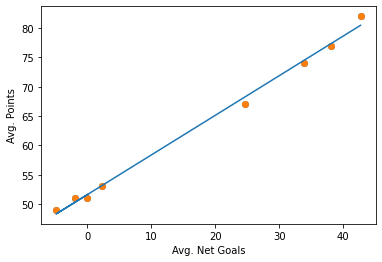

In [8]:
x = team_eval['Avg. Net Goals (1998-2007)']
y = team_eval['Avg. Points (1998-2007)']
plt.scatter(x, y)
mod = sm.OLS(y, sm.add_constant(x))
fitted = mod.fit()

plt.scatter(x, y)
intercept, slope = fitted.params 
plt.plot(x, x*slope + intercept)
plt.ylabel('Avg. Points')
plt.xlabel('Avg. Net Goals')
print(f' slope: {slope}')

In [9]:
intercept

51.622567005876434

In [10]:
#incomes
df = pd.DataFrame({'year': [year for year in range(2007, 2018)]})
expected_growth = 12* 0.8 + 0 * 0*2
avg_net_goals = float(team_eval[team_eval['Team']=='Tottenham Hotspur']['Avg. Net Goals (1998-2007)'])
df['expected_net_goals'] = np.array([avg_net_goals + i*expected_growth for i in range(0,11)])
df['expected_avg_points'] = fitted.predict(sm.add_constant(df['expected_net_goals'][1:]))
df['expected_avg_points'][0] = 51
df['expected_growth_of_points(%)'] = df['expected_avg_points']/df['expected_avg_points'].shift(1) 
df['expected_growth_of_points(%)'][0] = 1 
df['expected_growth_of_points(%)'] = (df['expected_growth_of_points(%)'] - 1) * 100
df['expected_growth_in_revenue(%)'] = df['expected_growth_of_points(%)']*1.52
df['expected_growth_in_revenueno_no_stadium'] = df['expected_growth_in_revenue(%)'] / 400 + 1
df['expected_growth_in_revenue'] = df['expected_growth_in_revenue(%)'] / 100 + 1
df

,year,expected_net_goals,expected_avg_points,expected_growth_of_points(%),expected_growth_in_revenue(%),expected_growth_in_revenueno_no_stadium,expected_growth_in_revenue
0,2007,-1.9,51.000000,0.000000,0.000000,1.000000,1.000000
1,2008,7.7,56.821750,11.415196,17.351098,1.043378,1.173511
2,2009,17.3,63.303848,11.407777,17.339820,1.043350,1.173398
3,2010,26.9,69.785947,10.239659,15.564282,1.038911,1.155643
4,2011,36.5,76.268045,9.288544,14.118587,1.035296,1.141186
5,2012,46.1,82.750143,8.499101,12.918634,1.032297,1.129186
6,2013,55.7,89.232242,7.833338,11.906674,1.029767,1.119067
7,2014,65.3,95.714340,7.264301,11.041737,1.027604,1.110417
8,2015,74.9,102.196438,6.772338,10.293953,1.025735,1.102940
9,2016,84.5,108.678537,6.342783,9.641030,1.024103,1.096410


In [11]:
def scanleft(xs, z):
    results = np.zeros(len(xs))
    results[0] = z
    for i in range(1,len(xs)):
        current = results[i - 1]
        results[i] = xs[i] * current
    return results

In [12]:
inc_stat3 = pd.DataFrame({'year': [year for year in range(2007, 2018)]})
inc_stat3['player_costs'] = [20] + [0.05 * 52 * (1.1)**i for i in range(10)]
inc_stat3['total_costs'] = inc_stat3['player_costs'] + list(income_statement.loc[9][1:12])
inc_stat3['base_revenue'] = list(income_statement.loc[5][1:12])
inc_stat3['growth_in_revenue'] = df['expected_growth_in_revenueno_no_stadium']
inc_stat3['total_revenue'] = inc_stat3['growth_in_revenue'] * inc_stat3['base_revenue'] 
inc_stat3['cap_ex'] = [3.3 * 1.04**i for i in range(11)]
inc_stat3['growth_in_total_revenue'] = inc_stat3['total_revenue']/inc_stat3['total_revenue'].shift(1)
inc_stat3['growth_in_total_revenue'][0] = 1
inc_stat3['nwc'] = scanleft(inc_stat3['growth_in_total_revenue'], nwc) #(this is wrong we need foldleft)
inc_stat3['delta_nwc'] = inc_stat3['nwc'] - inc_stat3['nwc'].shift(1)
inc_stat3['delta_nwc'][0] = inc_stat3['nwc'][0]
inc_stat3['depreciation'] = list(income_statement.loc[11][1:12])
inc_stat3['free_cash_flow'] = (inc_stat3['total_revenue'] - inc_stat3['total_costs']) * (1-0.35) - inc_stat3['cap_ex'] - inc_stat3['delta_nwc'] + 0.35 * inc_stat3['depreciation']
inc_stat3

,year,player_costs,total_costs,base_revenue,growth_in_revenue,total_revenue,cap_ex,growth_in_total_revenue,nwc,delta_nwc,depreciation,free_cash_flow
0,2007,20.000000,89.100000,74.10,1.000000,74.100000,3.300000,1.000000,-16.330000,-16.330000,2.20,4.050000
1,2008,2.600000,77.520000,80.77,1.043378,84.273620,3.432000,1.137296,-18.572041,-2.242041,2.29,4.001394
2,2009,2.860000,84.140000,88.04,1.043350,91.856494,3.569280,1.089979,-20.243138,-1.671098,2.38,3.950539
3,2010,3.146000,91.376000,95.96,1.038911,99.693871,3.712051,1.085322,-21.970323,-1.727184,2.47,4.286249
4,2011,3.460600,99.280600,104.60,1.035296,108.292010,3.860533,1.086245,-23.865162,-1.894840,2.57,4.791223
5,2012,3.806660,107.936660,114.01,1.032297,117.692134,4.014955,1.086803,-25.936741,-2.071579,2.68,5.335682
6,2013,4.187326,117.407326,124.27,1.029767,127.969106,4.175553,1.087321,-28.201559,-2.264817,2.78,5.927421
7,2014,4.606059,127.766059,135.46,1.027604,139.199284,4.342575,1.087757,-30.676441,-2.474883,2.90,6.578905
8,2015,5.066664,139.106664,147.65,1.025735,151.449756,4.516278,1.088007,-33.376174,-2.699733,3.01,7.259964
9,2016,5.573331,151.523331,160.94,1.024103,164.819068,4.696929,1.088276,-36.322475,-2.946301,3.13,7.987101


In [13]:
fcf = inc_stat3['free_cash_flow']
T = 10
PVs = np.zeros(T)
for t in np.arange(T):
    PVs[t] = fcf[t]/((1+r)**t)
NPV = PVs.sum()
NPV

33.91458306145989

D part